# Credit Card Transactions Fraud Detection

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/_portfolio/Applied_Data_Science_with_Python_Specialization/portfolio-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Train several models and evaluate how effectively they predict instances of fraud using the [Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection).

## Download the data

In [1]:
%%bash

wget -q https://raw.githubusercontent.com/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/main/Applied_Machine_Learning_in_Python/Week3/Labs/data/fraud_data.csv.gz
gunzip ./fraud_data.csv.gz 

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
sns.set_style("whitegrid")

## Load the data

Each row in the dataframe corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. The target is stored in the `class` column, where a value of `1` corresponds to an instance of fraud and `0` corresponds to an instance of not fraud.

In [3]:
df_fraud = pd.read_csv("./fraud_data.csv")
df_fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21688,-3.959670,3.297819,-1.079436,-2.290106,-1.405133,2.452586,-4.649235,-12.365464,0.409493,1.251992,...,12.617463,-2.969195,1.755050,0.433324,-0.010827,-0.126613,0.200111,-0.160542,29.95,0
21689,-1.066503,0.539240,0.735343,-0.506800,0.843980,-1.047877,1.141302,-0.127448,-0.119221,-1.870265,...,-0.162535,-0.576352,-0.184969,-0.136154,0.760012,0.048105,-0.017475,0.092365,85.66,0
21690,-2.175162,-0.441681,1.883137,-0.267440,1.056972,0.136404,0.113595,-0.055983,0.765616,-0.087568,...,-0.201561,0.397761,-0.855500,-0.627900,0.590977,0.515065,0.433089,-0.150291,131.10,0
21691,0.031406,0.694817,0.083233,-0.797912,0.564318,-0.560787,0.805901,0.051453,-0.053817,-0.200190,...,-0.255891,-0.664635,0.018844,-0.539177,-0.504019,0.155133,0.232846,0.079420,4.49,0


## Visualize the class distribution

How many instances of not fraud (encoded 0) and how many of fraud (encoded 1)?

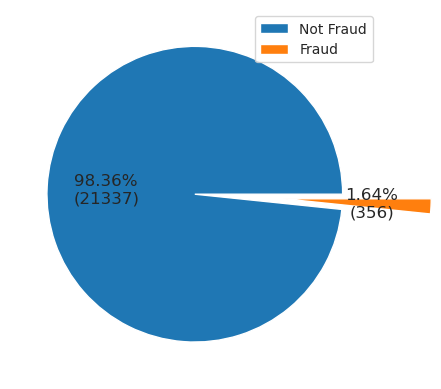

In [4]:
fraud = df_fraud["Class"].sum()
not_fraud = len(df_fraud) - fraud
labels = ["Not Fraud", "Fraud"]
sizes = [not_fraud, fraud]

fig, ax = plt.subplots()
ax.pie(sizes, explode=(0, 0.6), textprops={'fontsize': '12'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend(labels)
plt.show()

## Split the data into training and test sets

In [5]:
X = df_fraud.iloc[:, :-1]
y = df_fraud.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Train a Support Vector Classifier (SVC)

In [6]:
svc = SVC().fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9904    0.9996    0.9950      5344
           1     0.9333    0.3500    0.5091        80

    accuracy                         0.9900      5424
   macro avg     0.9618    0.6748    0.7520      5424
weighted avg     0.9895    0.9900    0.9878      5424



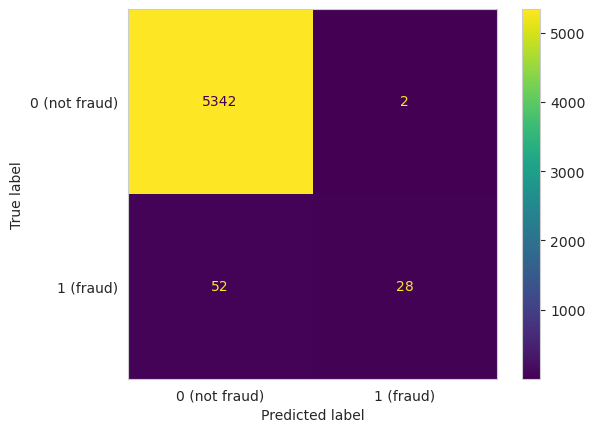

In [7]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (not fraud)", "1 (fraud)"])
plt.grid(False)
plt.show()

## Train a SVC with parameters C = $10^9$ and $\gamma$ = $10^{-7}$

In [8]:
svc = SVC(C=1e9, gamma=1e-7)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9970    0.9993    0.9981      5344
           1     0.9412    0.8000    0.8649        80

    accuracy                         0.9963      5424
   macro avg     0.9691    0.8996    0.9315      5424
weighted avg     0.9962    0.9963    0.9962      5424



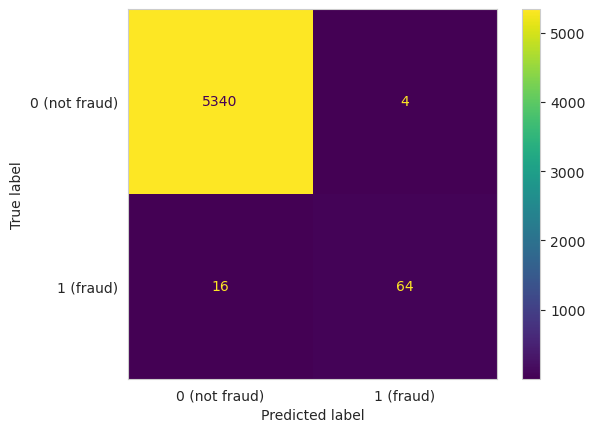

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (not fraud)", "1 (fraud)"])
plt.grid(False)
plt.show()

## Train a Logisitic Regression classifier

In [10]:
logit_classifier = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = logit_classifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9970    0.9996    0.9983      5344
           1     0.9697    0.8000    0.8767        80

    accuracy                         0.9967      5424
   macro avg     0.9834    0.8998    0.9375      5424
weighted avg     0.9966    0.9967    0.9965      5424



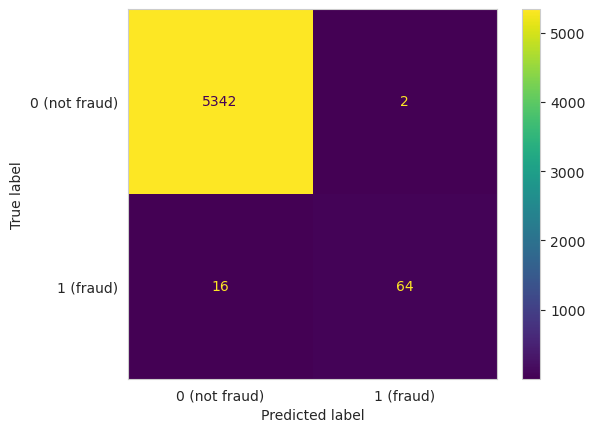

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (not fraud)", "1 (fraud)"])
plt.grid(False)
plt.show()

## Plot a Precision-Recall curve and a Receiver Operating Characteristic (ROC) curve using the test set

In [12]:
y_proba = logit_classifier.predict_proba(X_test)[:, -1]
y_score = logit_classifier.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

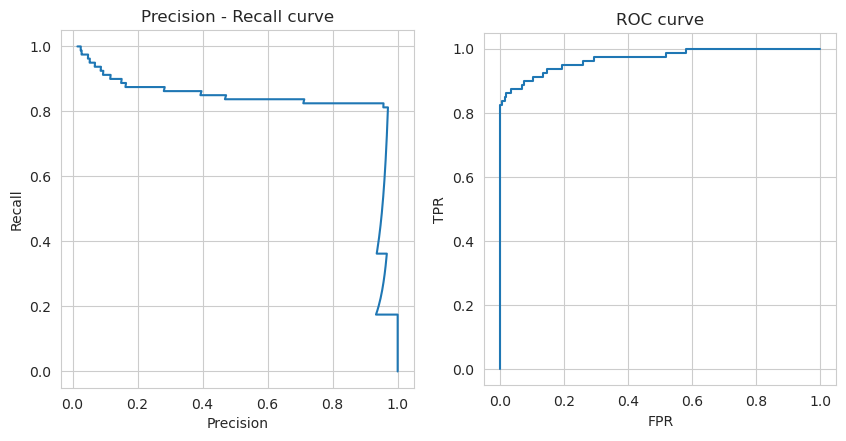

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(precision, recall)
ax1.set_title('Precision - Recall curve')
ax1.set_xlabel('Precision')
ax1.set_ylabel('Recall')
ax1.set_aspect('equal', 'box')

ax2.plot(fpr, tpr)
ax2.set_title('ROC curve')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.set_aspect('equal', 'box')

plt.show()

**Note**: 

Generally, the use of ROC curves and Precision-Recall curves are as follows:

- ROC curves should be used when there are roughly equal numbers of observations for each class.
- Precision-Recall curves should be used when there is a moderate to large class imbalance.

## Perform a grid search for a Logisitic Regression classifier

In [14]:
import numpy as np

C = np.logspace(-3, 3, 7)
parameters = {'C': C}

logit_classifier = LogisticRegression(max_iter=1000)
clf = GridSearchCV(logit_classifier, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='recall')

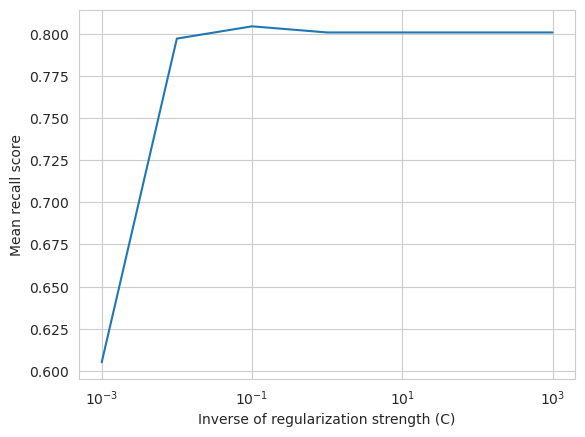

In [15]:
plt.figure()
plt.semilogx(C, clf.cv_results_['mean_test_score'])
plt.xlabel("Inverse of regularization strength (C)")
plt.ylabel("Mean recall score")
plt.xticks(C[::2])
plt.show()

## Evaluate the best estimator chosen by the grid search

In [16]:
logit_classifier = clf.best_estimator_
y_pred = logit_classifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9968    0.9996    0.9982      5344
           1     0.9692    0.7875    0.8690        80

    accuracy                         0.9965      5424
   macro avg     0.9830    0.8936    0.9336      5424
weighted avg     0.9964    0.9965    0.9963      5424



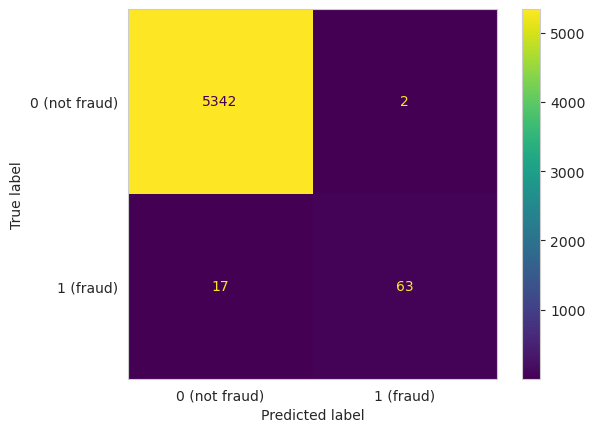

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (not fraud)", "1 (fraud)"])
plt.grid(False)
plt.show()

In [18]:
%%bash

rm ./fraud_data.csv